In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [204]:
# Parameters to make figures work better with illustrator 
import matplotlib 
# For higher resoltion figures
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300

matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
plt.rcParams["font.family"] = "Helvetica"
plt.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['font.sans-serif'] = 'Arial'

# Looking at all hydrophobics

In [3]:
# Data from:
# A complete map of human cytosolic degrons and their relevance for disease 
# Voutsinos V, Johansson KE, Larsen FB, Grønbæk-Thygesen M, Jonsson N et al. (2025)
data = pd.read_csv("../../Data/degron_data.csv")

In [181]:
# Define AA sets
positives = ["R", "K"]
negatives = ["D", "E"]

hydrophobics = ["M", "I", "L", "V", "A", "F", "Y", "W"]
hydrophobic_subset = ["I", "L", "F", "Y", "W"]

In [179]:
def contains_three(seq, aa_set):
    for i in range(len(seq)-5):
        if seq[i] in aa_set:
            if seq[i+1] in aa_set:
                if seq[i+2] in aa_set:
                    return True
    return False

def contains_two(seq, aa_set):
    for i in range(len(seq)-3):
        if seq[i] in aa_set:
            if seq[i+1] in aa_set:
                return True
    return False


def contains_one(seq, aa_set):
    for i in range(len(seq)-1):
        if seq[i] in aa_set:
            return True
    return False

In [187]:
data["ends_w_charge"] = [(s[-1] in positives) | (s[-1] in negatives) for s in data["aa"]]
data["ends_w_hydrophobic"] = [(s[-1] in hydrophobics) for s in data["aa"]]
data["ends_w_subset_hydrophobic"] = [(s[-1] in hydrophobic_subset) for s in data["aa"]]

data["ends_w_two_charge"] = [((s[-1] in positives) | (s[-1] in negatives)) & ((s[-2] in positives) | (s[-2] in negatives)) for s in data["aa"]]
data["ends_w_two_hydrophobic"] = [(s[-1] in hydrophobics) & (s[-2] in hydrophobics) for s in data["aa"]]
data["ends_w_two_subset_hydrophobic"] = [(s[-1] in hydrophobic_subset) & (s[-2] in hydrophobic_subset) for s in data["aa"]]

data["ends_w_three_charge"] = [((s[-1] in positives) | (s[-1] in negatives)) & ((s[-2] in positives) | (s[-2] in negatives)) & ((s[-3] in positives) | (s[-3] in negatives)) for s in data["aa"]]
data["ends_w_three_hydrophobic"] = [(s[-1] in hydrophobics) & (s[-2] in hydrophobics) & (s[-3] in hydrophobics) for s in data["aa"]]
data["ends_w_three_subset_hydrophobic"] = [(s[-1] in hydrophobic_subset) & (s[-2] in hydrophobic_subset) & (s[-3] in hydrophobic_subset) for s in data["aa"]]

data["contains_three_hydrophobic"] = [contains_three(s, hydrophobics) for s in data["aa"]]
data["contains_two_hydrophobic"] = [contains_two(s, hydrophobics) for s in data["aa"]]
data["contains_hydrophobic"] = [contains_one(s, hydrophobics) for s in data["aa"]]

data["contains_three_subset_hydrophobic"] = [contains_three(s, hydrophobic_subset) for s in data["aa"]]
data["contains_two_subset_hydrophobic"] = [contains_two(s, hydrophobic_subset) for s in data["aa"]]
data["contains_subset_hydrophobic"] = [contains_one(s, hydrophobic_subset) for s in data["aa"]]

In [210]:
from scipy.stats import mannwhitneyu
group1 = data[data['ends_w_hydrophobic']]['abundance_score'].dropna()
group2 = data[data['contains_hydrophobic'] & ~data['ends_w_hydrophobic']]['abundance_score'].dropna()
stat, p = mannwhitneyu(group1, group2, alternative="less") 
p

6.292270833058275e-283

In [211]:
from scipy.stats import mannwhitneyu
group1 = data[data['ends_w_subset_hydrophobic']]['abundance_score'].dropna()
group2 = data[data['contains_subset_hydrophobic'] & ~data['ends_w_subset_hydrophobic']]['abundance_score'].dropna()
stat, p = mannwhitneyu(group1, group2, alternative="less") 
p

7.786314093349562e-77

In [212]:
group1 = data[data['ends_w_two_hydrophobic']]['abundance_score'].dropna()
group2 = data[data['contains_two_hydrophobic'] & ~data['ends_w_two_hydrophobic']]['abundance_score'].dropna()
stat, p = mannwhitneyu(group1, group2, alternative="less") 
p

1.0415945539587412e-177

In [213]:
group1 = data[data['ends_w_two_subset_hydrophobic']]['abundance_score'].dropna()
group2 = data[data['contains_two_subset_hydrophobic'] & ~data['ends_w_two_subset_hydrophobic']]['abundance_score'].dropna()
stat, p = mannwhitneyu(group1, group2, alternative="less") 
p

0.0030014413004801053

In [161]:
group1 = data[data['ends_w_three_hydrophobic']]['abundance_score'].dropna()
group2 = data[data['contains_three_hydrophobic'] & ~data['ends_w_three_hydrophobic'] ]['abundance_score'].dropna()
stat, p = mannwhitneyu(group1, group2, alternative="less") 
p

2.8644984554040795e-45

In [214]:
group1 = data[data['ends_w_three_subset_hydrophobic']]['abundance_score'].dropna()
group2 = data[data['contains_three_subset_hydrophobic'] & ~data['ends_w_three_subset_hydrophobic'] ]['abundance_score'].dropna()
stat, p = mannwhitneyu(group1, group2, alternative="less") 
p

0.7576328051271859

1 extra bytes in post.stringData array
'created' timestamp seems very low; regarding as unix timestamp


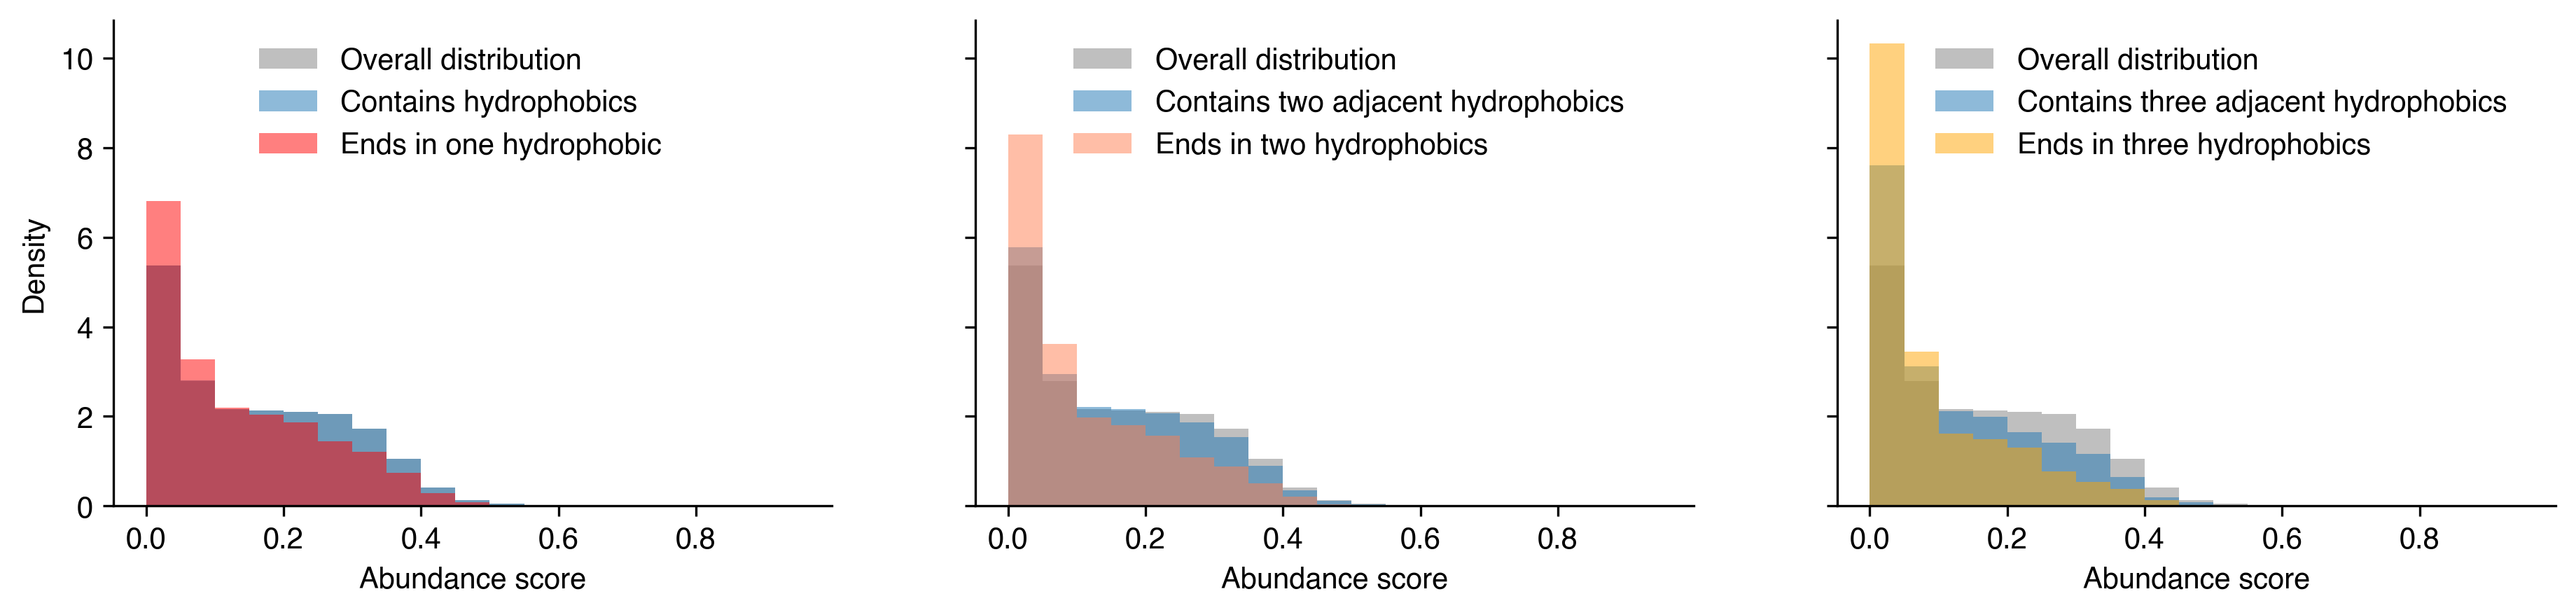

In [205]:
fig, axs = plt.subplots(1, 3, figsize=(15,3), sharey=True, sharex=True)
axs[0].hist(data["abundance_score"], density=True, label="Overall distribution",  alpha=0.5, bins=np.arange(0, 1, 0.05), color='grey')

axs[0].hist(data[data["contains_hydrophobic"]]["abundance_score"], density=True, alpha=0.5, label="Contains hydrophobics", bins=np.arange(0, 1, 0.05))
axs[0].hist(data[data["ends_w_hydrophobic"]]["abundance_score"], density=True, alpha=0.5, label="Ends in one hydrophobic",  bins=np.arange(0, 1, 0.05), color="red")
axs[0].set_xlabel("Abundance score")
axs[0].set_ylabel("Density")

axs[0].legend(bbox_to_anchor=(0.8,1), frameon=False)

axs[1].hist(data["abundance_score"], density=True, label="Overall distribution",  alpha=0.5, bins=np.arange(0, 1, 0.05), color='grey')

axs[1].hist(data[data["contains_two_hydrophobic"]]["abundance_score"], density=True, alpha=0.5, label="Contains two adjacent hydrophobics", bins=np.arange(0, 1, 0.05))
axs[1].hist(data[data["ends_w_two_hydrophobic"]]["abundance_score"], density=True, alpha=0.5, label="Ends in two hydrophobics",  bins=np.arange(0, 1, 0.05), color="coral")
axs[1].set_xlabel("Abundance score")

axs[1].legend(bbox_to_anchor=(0.1,1), frameon=False)

axs[2].hist(data["abundance_score"], density=True, label="Overall distribution",  alpha=0.5, bins=np.arange(0, 1, 0.05), color='grey')

axs[2].hist(data[data["contains_three_hydrophobic"]]["abundance_score"], density=True, alpha=0.5, label="Contains three adjacent hydrophobics", bins=np.arange(0, 1, 0.05))
axs[2].hist(data[data["ends_w_three_hydrophobic"]]["abundance_score"], density=True, alpha=0.5, label="Ends in three hydrophobics",  bins=np.arange(0, 1, 0.05), color="orange")
axs[2].set_xlabel("Abundance score")

axs[2].legend(bbox_to_anchor=(0.1,1), frameon=False)

sns.despine()

plt.savefig("../../figures/degron_screen_all.pdf", format='pdf', bbox_inches='tight')

1 extra bytes in post.stringData array
'created' timestamp seems very low; regarding as unix timestamp


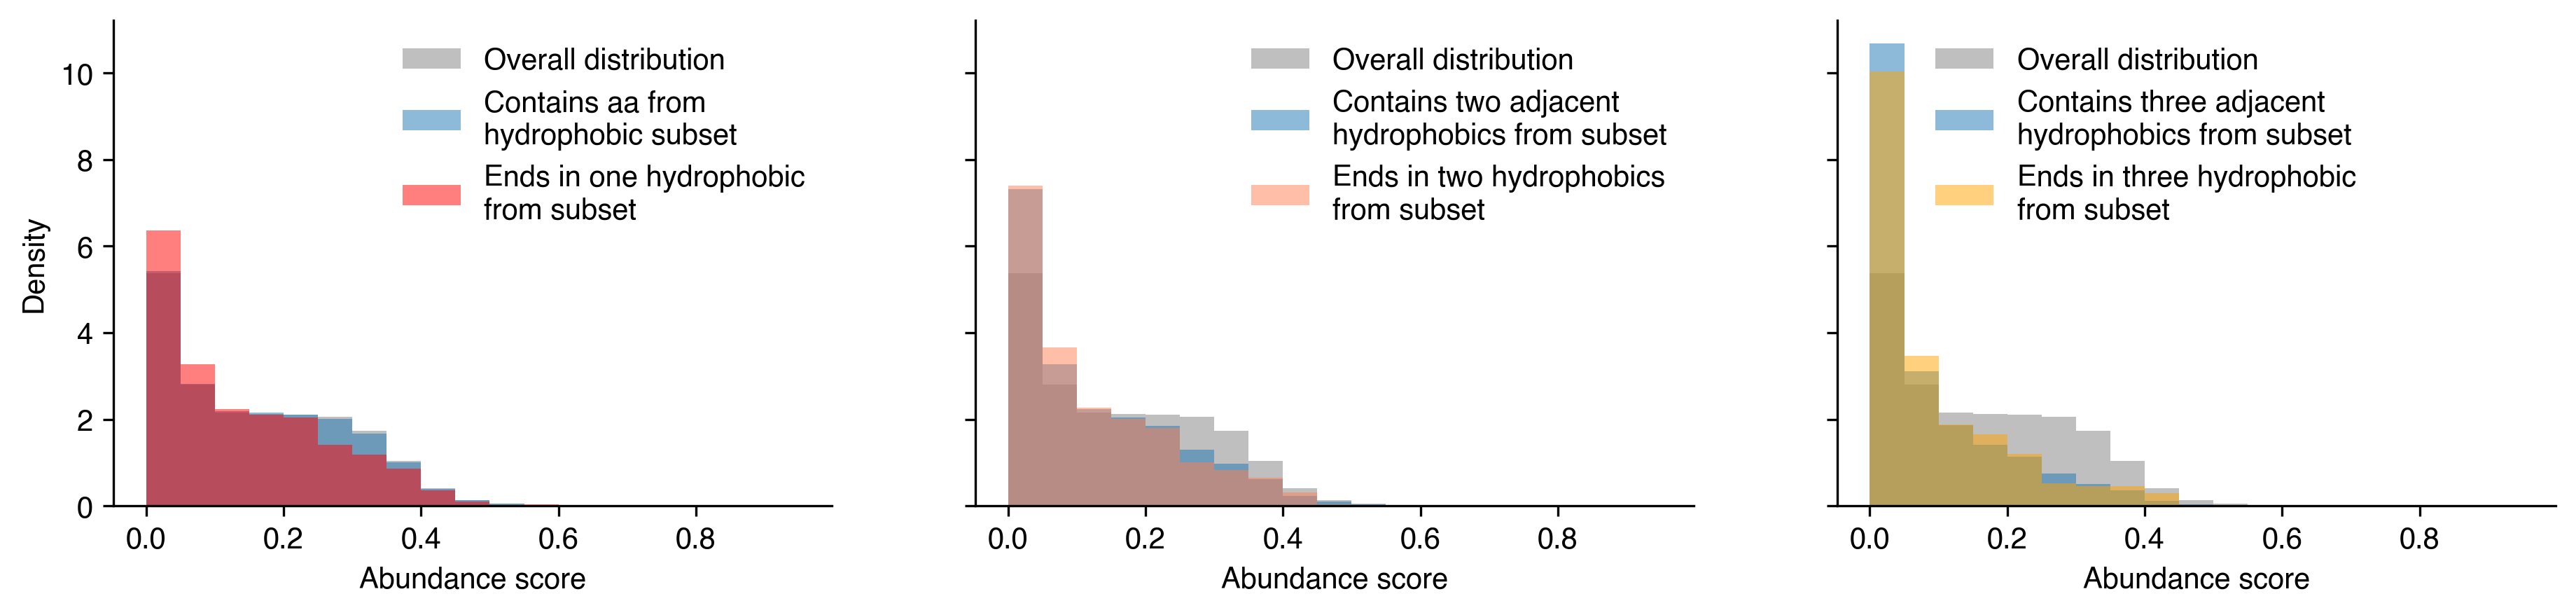

In [206]:
fig, axs = plt.subplots(1, 3, figsize=(15,3), sharey=True, sharex=True)
axs[0].hist(data["abundance_score"], density=True, label="Overall distribution",  alpha=0.5, bins=np.arange(0, 1, 0.05), color='grey')

axs[0].hist(data[data["contains_subset_hydrophobic"]]["abundance_score"], density=True, alpha=0.5, label="Contains aa from\nhydrophobic subset ", bins=np.arange(0, 1, 0.05))
axs[0].hist(data[data["ends_w_subset_hydrophobic"]]["abundance_score"], density=True, alpha=0.5, label="Ends in one hydrophobic\nfrom subset",  bins=np.arange(0, 1, 0.05), color="red")
axs[0].set_xlabel("Abundance score")
axs[0].set_ylabel("Density")

axs[0].legend(bbox_to_anchor=(1,1), frameon=False)

axs[1].hist(data["abundance_score"], density=True, label="Overall distribution",  alpha=0.5, bins=np.arange(0, 1, 0.05), color='grey')

axs[1].hist(data[data["contains_two_subset_hydrophobic"]]["abundance_score"], density=True, alpha=0.5, label="Contains two adjacent\nhydrophobics from subset", bins=np.arange(0, 1, 0.05))
axs[1].hist(data[data["ends_w_two_subset_hydrophobic"]]["abundance_score"], density=True, alpha=0.5, label="Ends in two hydrophobics\nfrom subset",  bins=np.arange(0, 1, 0.05), color="coral")
axs[1].set_xlabel("Abundance score")

axs[1].legend(bbox_to_anchor=(1,1), frameon=False)

axs[2].hist(data["abundance_score"], density=True, label="Overall distribution",  alpha=0.5, bins=np.arange(0, 1, 0.05), color='grey')

axs[2].hist(data[data["contains_three_subset_hydrophobic"]]["abundance_score"], density=True, alpha=0.5, label="Contains three adjacent\nhydrophobics from subset", bins=np.arange(0, 1, 0.05))
axs[2].hist(data[data["ends_w_three_subset_hydrophobic"]]["abundance_score"], density=True, alpha=0.5, label="Ends in three hydrophobic\nfrom subset",  bins=np.arange(0, 1, 0.05), color="orange")
axs[2].set_xlabel("Abundance score")

axs[2].legend(bbox_to_anchor=(0.1,1), frameon=False)

sns.despine()

plt.savefig("../../figures/degron_screen_subset.pdf", format='pdf', bbox_inches='tight')

# Looking at the second degron screen

In [128]:
# Data from Comprehensive degron mapping in human transcription factors
# Larsen FB, Voutsinos V, Jonsson N, Johansson KE, Ethelberg FD et al. (2025)
TF_data = pd.read_excel("../../Data/TF_degron_screen.xlsx")

In [216]:
TF_data["ends_w_charge"] = [(s[-1] in positives) | (s[-1] in negatives) for s in TF_data["aa"]]
TF_data["ends_w_hydrophobic"] = [(s[-1] in hydrophobics) for s in TF_data["aa"]]
TF_data["ends_w_subset_hydrophobic"] = [(s[-1] in hydrophobic_subset) for s in TF_data["aa"]]

TF_data["ends_w_two_charge"] = [((s[-1] in positives) | (s[-1] in negatives)) & ((s[-2] in positives) | (s[-2] in negatives)) for s in TF_data["aa"]]
TF_data["ends_w_two_hydrophobic"] = [(s[-1] in hydrophobics) & (s[-2] in hydrophobics) for s in TF_data["aa"]]
TF_data["ends_w_two_subset_hydrophobic"] = [(s[-1] in hydrophobic_subset) & (s[-2] in hydrophobic_subset) for s in TF_data["aa"]]

TF_data["ends_w_three_charge"] = [((s[-1] in positives) | (s[-1] in negatives)) & ((s[-2] in positives) | (s[-2] in negatives)) & ((s[-3] in positives) | (s[-3] in negatives)) for s in TF_data["aa"]]
TF_data["ends_w_three_hydrophobic"] = [(s[-1] in hydrophobics) & (s[-2] in hydrophobics) & (s[-3] in hydrophobics) for s in TF_data["aa"]]
TF_data["ends_w_three_subset_hydrophobic"] = [(s[-1] in hydrophobic_subset) & (s[-2] in hydrophobic_subset) & (s[-3] in hydrophobic_subset) for s in TF_data["aa"]]


TF_data["contains_three_hydrophobic"] = [contains_three(s, hydrophobics) for s in TF_data["aa"]]
TF_data["contains_two_hydrophobic"] = [contains_two(s, hydrophobics) for s in TF_data["aa"]]
TF_data["contains_hydrophobic"] = [contains_one(s, hydrophobics) for s in TF_data["aa"]]

TF_data["contains_three_subset_hydrophobic"] = [contains_three(s, hydrophobic_subset) for s in TF_data["aa"]]
TF_data["contains_two_subset_hydrophobic"] = [contains_two(s, hydrophobic_subset) for s in TF_data["aa"]]
TF_data["contains_subset_hydrophobic"] = [contains_one(s, hydrophobic_subset) for s in TF_data["aa"]]

1 extra bytes in post.stringData array
'created' timestamp seems very low; regarding as unix timestamp


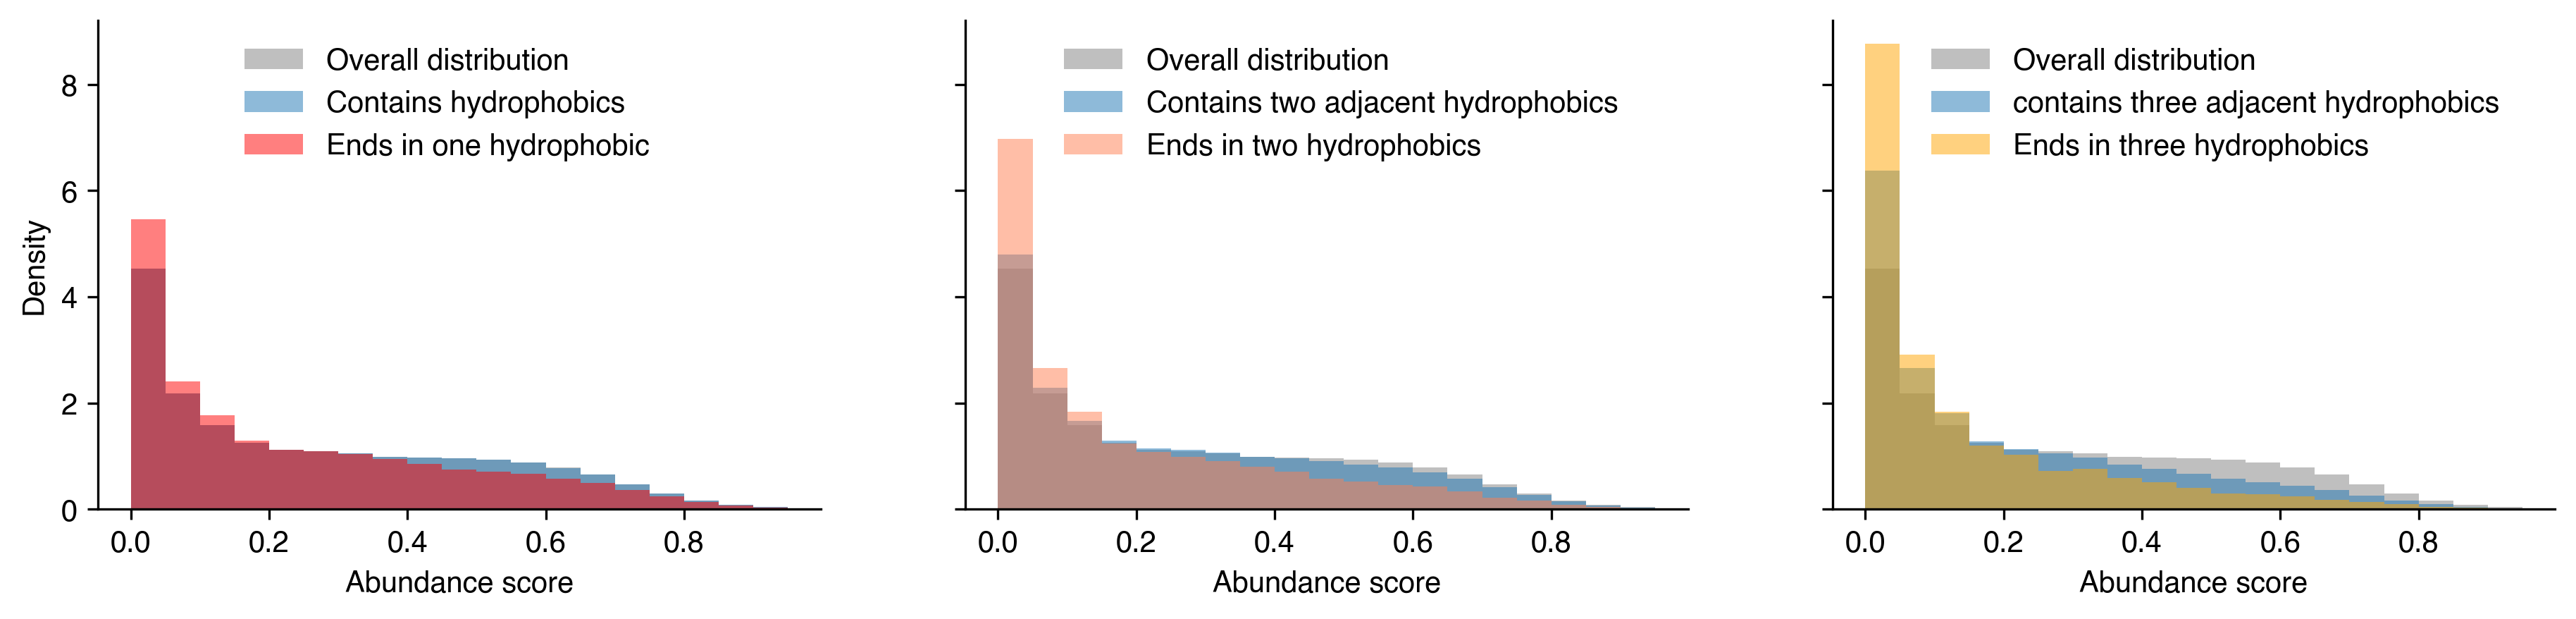

In [208]:
fig, axs = plt.subplots(1, 3, figsize=(15,3), sharey=True, sharex=True)
axs[0].hist(TF_data["abundance_score"], density=True, label="Overall distribution",  alpha=0.5, bins=np.arange(0, 1, 0.05), color='grey')

axs[0].hist(TF_data[TF_data["contains_hydrophobic"]]["abundance_score"], density=True, alpha=0.5, label="Contains hydrophobics", bins=np.arange(0, 1, 0.05))
axs[0].hist(TF_data[TF_data["ends_w_hydrophobic"]]["abundance_score"], density=True, alpha=0.5, label="Ends in one hydrophobic",  bins=np.arange(0, 1, 0.05), color="red")
axs[0].set_xlabel("Abundance score")
axs[0].set_ylabel("Density")

axs[0].legend(bbox_to_anchor=(0.8,1), frameon=False)

axs[1].hist(TF_data["abundance_score"], density=True, label="Overall distribution",  alpha=0.5, bins=np.arange(0, 1, 0.05), color='grey')

axs[1].hist(TF_data[TF_data["contains_two_hydrophobic"]]["abundance_score"], density=True, alpha=0.5, label="Contains two adjacent hydrophobics", bins=np.arange(0, 1, 0.05))
axs[1].hist(TF_data[TF_data["ends_w_two_hydrophobic"]]["abundance_score"], density=True, alpha=0.5, label="Ends in two hydrophobics",  bins=np.arange(0, 1, 0.05), color="coral")
axs[1].set_xlabel("Abundance score")

axs[1].legend(bbox_to_anchor=(0.1,1), frameon=False)

axs[2].hist(TF_data["abundance_score"], density=True, label="Overall distribution",  alpha=0.5, bins=np.arange(0, 1, 0.05), color='grey')

axs[2].hist(TF_data[TF_data["contains_three_hydrophobic"]]["abundance_score"], density=True, alpha=0.5, label="contains three adjacent hydrophobics", bins=np.arange(0, 1, 0.05))
axs[2].hist(TF_data[TF_data["ends_w_three_hydrophobic"]]["abundance_score"], density=True, alpha=0.5, label="Ends in three hydrophobics",  bins=np.arange(0, 1, 0.05), color="orange")
axs[2].set_xlabel("Abundance score")

axs[2].legend(bbox_to_anchor=(0.1,1), frameon=False)

sns.despine()

plt.savefig("../../figures/TF_degron_screen_all.pdf", format='pdf', bbox_inches='tight')

1 extra bytes in post.stringData array
'created' timestamp seems very low; regarding as unix timestamp


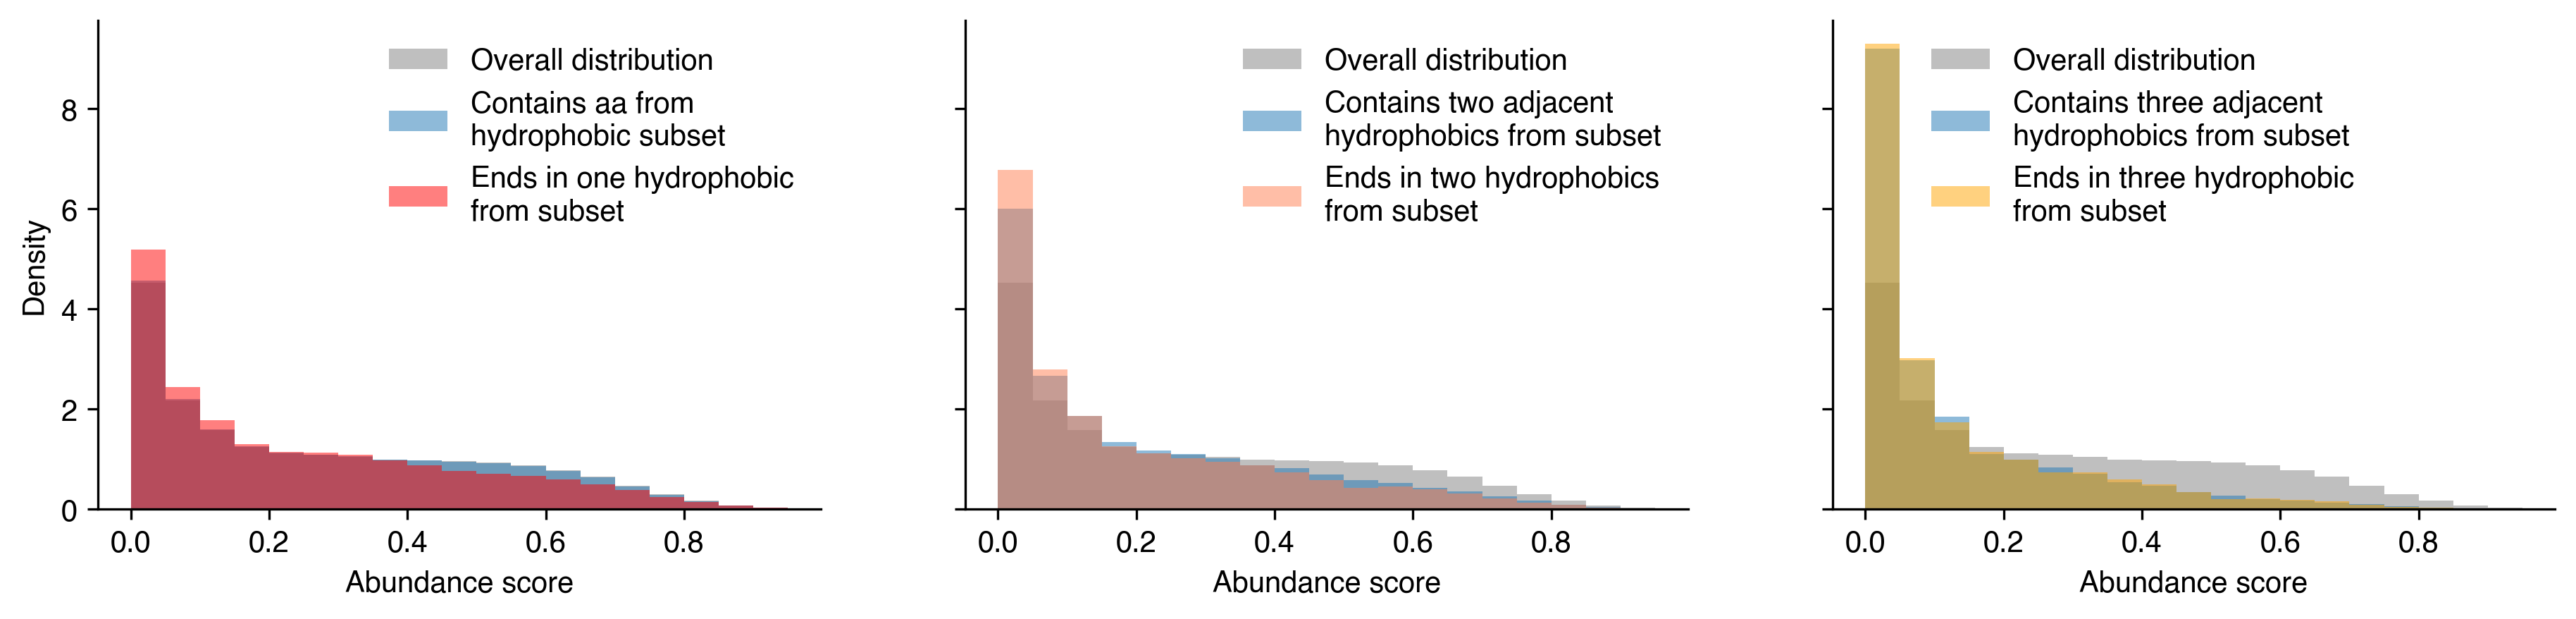

In [209]:
fig, axs = plt.subplots(1, 3, figsize=(15,3), sharey=True, sharex=True)
axs[0].hist(TF_data["abundance_score"], density=True, label="Overall distribution",  alpha=0.5, bins=np.arange(0, 1, 0.05), color='grey')

axs[0].hist(TF_data[TF_data["contains_subset_hydrophobic"]]["abundance_score"], density=True, alpha=0.5, label="Contains aa from\nhydrophobic subset ", bins=np.arange(0, 1, 0.05))
axs[0].hist(TF_data[TF_data["ends_w_subset_hydrophobic"]]["abundance_score"], density=True, alpha=0.5, label="Ends in one hydrophobic\nfrom subset",  bins=np.arange(0, 1, 0.05), color="red")
axs[0].set_xlabel("Abundance score")
axs[0].set_ylabel("Density")

axs[0].legend(bbox_to_anchor=(1,1), frameon=False)

axs[1].hist(TF_data["abundance_score"], density=True, label="Overall distribution",  alpha=0.5, bins=np.arange(0, 1, 0.05), color='grey')

axs[1].hist(TF_data[TF_data["contains_two_subset_hydrophobic"]]["abundance_score"], density=True, alpha=0.5, label="Contains two adjacent\nhydrophobics from subset", bins=np.arange(0, 1, 0.05))
axs[1].hist(TF_data[TF_data["ends_w_two_subset_hydrophobic"]]["abundance_score"], density=True, alpha=0.5, label="Ends in two hydrophobics\nfrom subset",  bins=np.arange(0, 1, 0.05), color="coral")
axs[1].set_xlabel("Abundance score")

axs[1].legend(bbox_to_anchor=(1,1), frameon=False)

axs[2].hist(TF_data["abundance_score"], density=True, label="Overall distribution",  alpha=0.5, bins=np.arange(0, 1, 0.05), color='grey')

axs[2].hist(TF_data[TF_data["contains_three_subset_hydrophobic"]]["abundance_score"], density=True, alpha=0.5, label="Contains three adjacent\nhydrophobics from subset", bins=np.arange(0, 1, 0.05))
axs[2].hist(TF_data[TF_data["ends_w_three_subset_hydrophobic"]]["abundance_score"], density=True, alpha=0.5, label="Ends in three hydrophobic\nfrom subset",  bins=np.arange(0, 1, 0.05), color="orange")
axs[2].set_xlabel("Abundance score")

axs[2].legend(bbox_to_anchor=(0.1,1), frameon=False)

sns.despine()

plt.savefig("../../figures/TF_degron_screen_subset.pdf", format='pdf', bbox_inches='tight')

In [217]:
group1 = TF_data[TF_data['ends_w_three_hydrophobic']]['abundance_score'].dropna()
group2 = TF_data[TF_data['contains_three_hydrophobic'] & ~TF_data['ends_w_three_hydrophobic'] ]['abundance_score'].dropna()
stat, p = mannwhitneyu(group1, group2, alternative="less") 
p

8.008101763129695e-242

In [219]:
group1 = TF_data[TF_data['ends_w_three_subset_hydrophobic']]['abundance_score'].dropna()
group2 = TF_data[TF_data['contains_three_subset_hydrophobic'] & ~TF_data['ends_w_three_subset_hydrophobic'] ]['abundance_score'].dropna()
stat, p = mannwhitneyu(group1, group2, alternative="less") 
p

0.01841389680267489

In [220]:
group1 = TF_data[TF_data['ends_w_two_hydrophobic']]['abundance_score'].dropna()
group2 = TF_data[TF_data['contains_two_hydrophobic'] & ~TF_data['ends_w_two_hydrophobic'] ]['abundance_score'].dropna()
stat, p = mannwhitneyu(group1, group2, alternative="less") 
p

0.0

In [221]:
group1 = TF_data[TF_data['ends_w_two_subset_hydrophobic']]['abundance_score'].dropna()
group2 = TF_data[TF_data['contains_two_subset_hydrophobic'] & ~TF_data['ends_w_two_subset_hydrophobic'] ]['abundance_score'].dropna()
stat, p = mannwhitneyu(group1, group2, alternative="less") 
p

7.952425891232677e-41

In [133]:
group1 = TF_data[TF_data['ends_w_hydrophobic']]['abundance_score'].dropna()
group2 = TF_data[TF_data['contains_hydrophobic'] & ~TF_data['ends_w_hydrophobic'] ]['abundance_score'].dropna()
stat, p = mannwhitneyu(group1, group2, alternative="less") 
p

2.714676945961992e-290

In [222]:
group1 = TF_data[TF_data['ends_w_subset_hydrophobic']]['abundance_score'].dropna()
group2 = TF_data[TF_data['contains_subset_hydrophobic'] & ~TF_data['ends_w_subset_hydrophobic'] ]['abundance_score'].dropna()
stat, p = mannwhitneyu(group1, group2, alternative="less") 
p

3.6774667599847105e-230

# Analyzing our data

In [226]:
# Reading in the data
our_data = pd.read_csv("../../Data/pm_gcn4_sort2_pools_allchannels_wrangled.csv")
our_data

,aa_seq,activity,abundance,ratio
0,LQDFVLFDQPIRPHRQHNRNALQPPTRGINLNQQHRSQHL,270.500000,2275.157246,23705.971880
1,DLFGGLESSTPWIREQERIHLQYVEGLRWVTWGQMGHVEL,478.640464,4281.992228,7965.856073
2,VEHSPAEKSDDLEVVEPTSGHQRRKSGTSPPSGRHSSVSG,1081.420642,3180.013344,18161.451312
3,NAGTASRFLTTVVALCSPSDVSSTVLTGNARMQVRPIGPL,603.933187,1160.105019,52119.378755
4,QQQHRPHSTLQASSASPIQNPRVSDLSQDTGSIASSTSPQ,425.945104,3136.116978,19044.671497
...,...,...,...,...
17727,LYDESPDFGSGFDVSPNFAGSDFDAGGNDVWFPLFPQSNT,8178.009196,3209.784417,262143.000000
17728,HANRGPDFDALFDLTANSFVDGLDAASLAMFDTQQLDKVQ,9064.000000,4649.000000,262143.000000
17729,LYESPDFGYDVSPGFGSNDFDTGSNQWFSLFPDQSTTPDA,9064.000000,4649.000000,262143.000000
17730,TPNIPQEFFDFTEGFGEEFTDSTMLSPHLVPTGIMASKDS,4862.343223,111.000000,262143.000000


In [228]:
our_data["ends_w_charge"] = [(s[-1] in positives) | (s[-1] in negatives) for s in our_data["aa_seq"]]
our_data["ends_w_hydrophobic"] = [(s[-1] in hydrophobics) for s in our_data["aa_seq"]]
our_data["ends_w_subset_hydrophobic"] = [(s[-1] in hydrophobic_subset) for s in our_data["aa_seq"]]

our_data["ends_w_two_charge"] = [((s[-1] in positives) | (s[-1] in negatives)) & ((s[-2] in positives) | (s[-2] in negatives)) for s in our_data["aa_seq"]]
our_data["ends_w_two_hydrophobic"] = [(s[-1] in hydrophobics) & (s[-2] in hydrophobics) for s in our_data["aa_seq"]]
our_data["ends_w_two_subset_hydrophobic"] = [(s[-1] in hydrophobic_subset) & (s[-2] in hydrophobic_subset) for s in our_data["aa_seq"]]

our_data["ends_w_three_charge"] = [((s[-1] in positives) | (s[-1] in negatives)) & ((s[-2] in positives) | (s[-2] in negatives)) & ((s[-3] in positives) | (s[-3] in negatives)) for s in our_data["aa_seq"]]
our_data["ends_w_three_hydrophobic"] = [(s[-1] in hydrophobics) & (s[-2] in hydrophobics) & (s[-3] in hydrophobics) for s in our_data["aa_seq"]]
our_data["ends_w_three_subset_hydrophobic"] = [(s[-1] in hydrophobic_subset) & (s[-2] in hydrophobic_subset) & (s[-3] in hydrophobic_subset) for s in our_data["aa_seq"]]


our_data["contains_three_hydrophobic"] = [contains_three(s, hydrophobics) for s in our_data["aa_seq"]]
our_data["contains_two_hydrophobic"] = [contains_two(s, hydrophobics) for s in our_data["aa_seq"]]
our_data["contains_hydrophobic"] = [contains_one(s, hydrophobics) for s in our_data["aa_seq"]]

our_data["contains_three_subset_hydrophobic"] = [contains_three(s, hydrophobic_subset) for s in our_data["aa_seq"]]
our_data["contains_two_subset_hydrophobic"] = [contains_two(s, hydrophobic_subset) for s in our_data["aa_seq"]]
our_data["contains_subset_hydrophobic"] = [contains_one(s, hydrophobic_subset) for s in our_data["aa_seq"]]

1 extra bytes in post.stringData array
'created' timestamp seems very low; regarding as unix timestamp


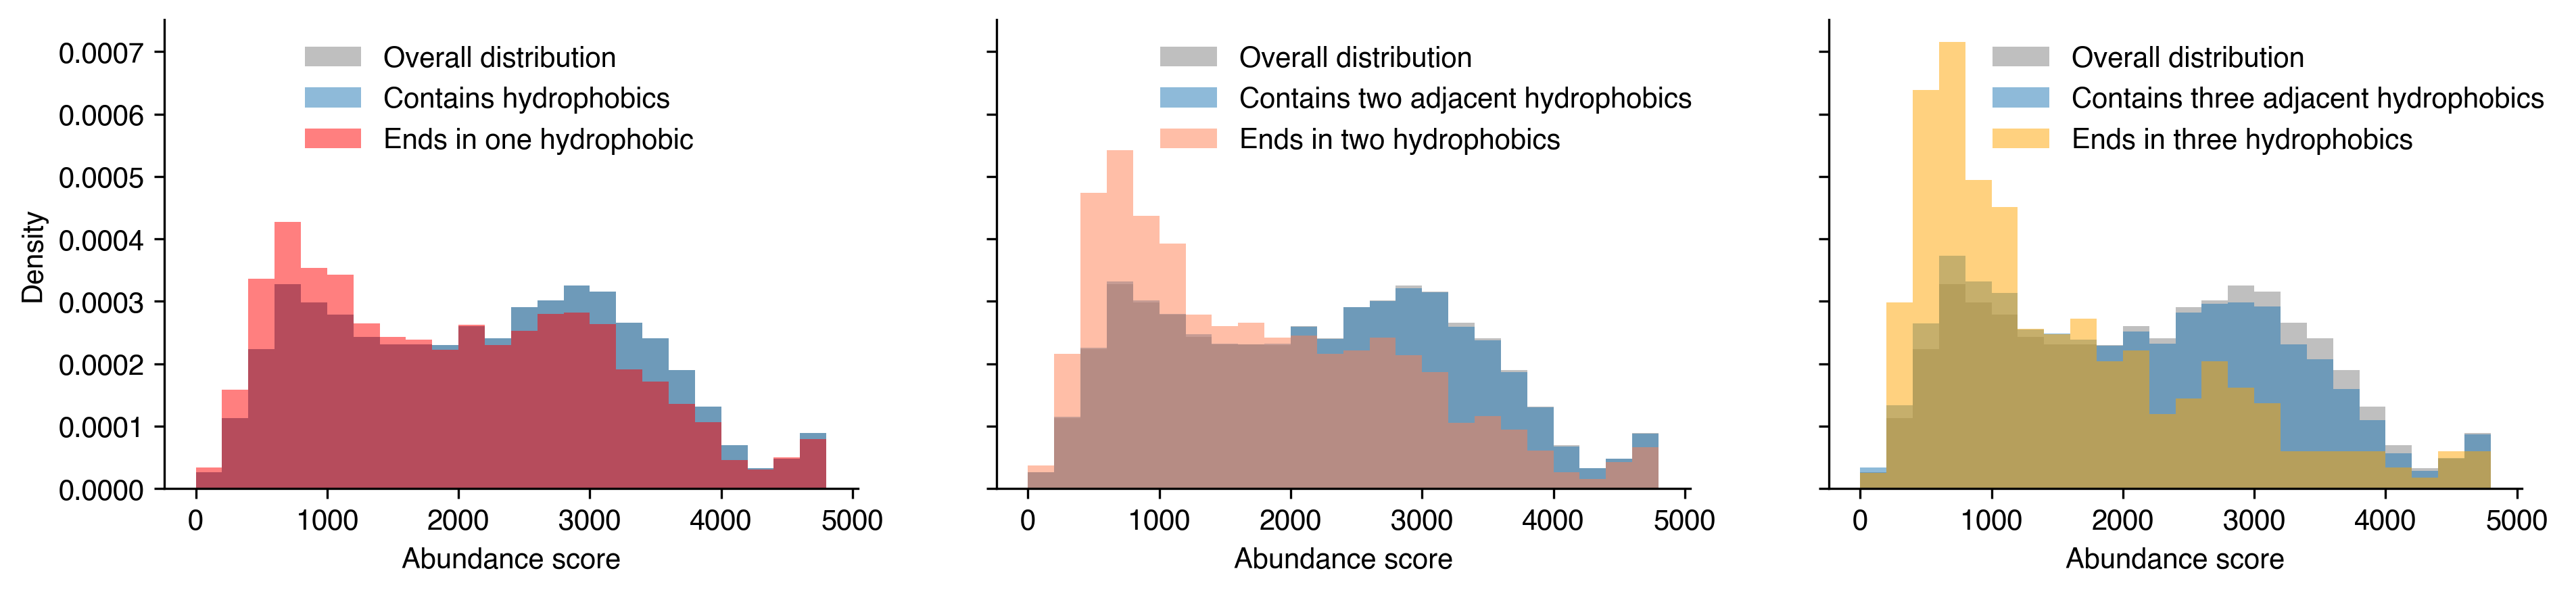

In [246]:
bins = np.arange(0, 5000, 200)
fig, axs = plt.subplots(1, 3, figsize=(15,3), sharey=True, sharex=True)
axs[0].hist(our_data["abundance"], density=True, label="Overall distribution",  alpha=0.5, bins=bins, color='grey')

axs[0].hist(our_data[our_data["contains_hydrophobic"]]["abundance"], density=True, alpha=0.5, label="Contains hydrophobics", bins=bins)
axs[0].hist(our_data[our_data["ends_w_hydrophobic"]]["abundance"], density=True, alpha=0.5, label="Ends in one hydrophobic",  bins=bins, color="red")
axs[0].set_xlabel("Abundance score")
axs[0].set_ylabel("Density")

axs[0].legend(bbox_to_anchor=(0.8,1), frameon=False)

axs[1].hist(our_data["abundance"], density=True, label="Overall distribution",  alpha=0.5, bins=bins, color='grey')

axs[1].hist(our_data[our_data["contains_two_hydrophobic"]]["abundance"], density=True, alpha=0.5, label="Contains two adjacent hydrophobics", bins=bins)
axs[1].hist(our_data[our_data["ends_w_two_hydrophobic"]]["abundance"], density=True, alpha=0.5, label="Ends in two hydrophobics",  bins=bins, color="coral")
axs[1].set_xlabel("Abundance score")

axs[1].legend(bbox_to_anchor=(0.2,1), frameon=False)

axs[2].hist(our_data["abundance"], density=True, label="Overall distribution",  alpha=0.5, bins=bins, color='grey')

axs[2].hist(our_data[our_data["contains_three_hydrophobic"]]["abundance"], density=True, alpha=0.5, label="Contains three adjacent hydrophobics", bins=bins)
axs[2].hist(our_data[our_data["ends_w_three_hydrophobic"]]["abundance"], density=True, alpha=0.5, label="Ends in three hydrophobics",  bins=bins, color="orange")
axs[2].set_xlabel("Abundance score")

axs[2].legend(bbox_to_anchor=(0.2,1), frameon=False)

sns.despine()

plt.savefig("../../figures/our_screen_all.pdf", format='pdf', bbox_inches='tight')

1 extra bytes in post.stringData array
'created' timestamp seems very low; regarding as unix timestamp


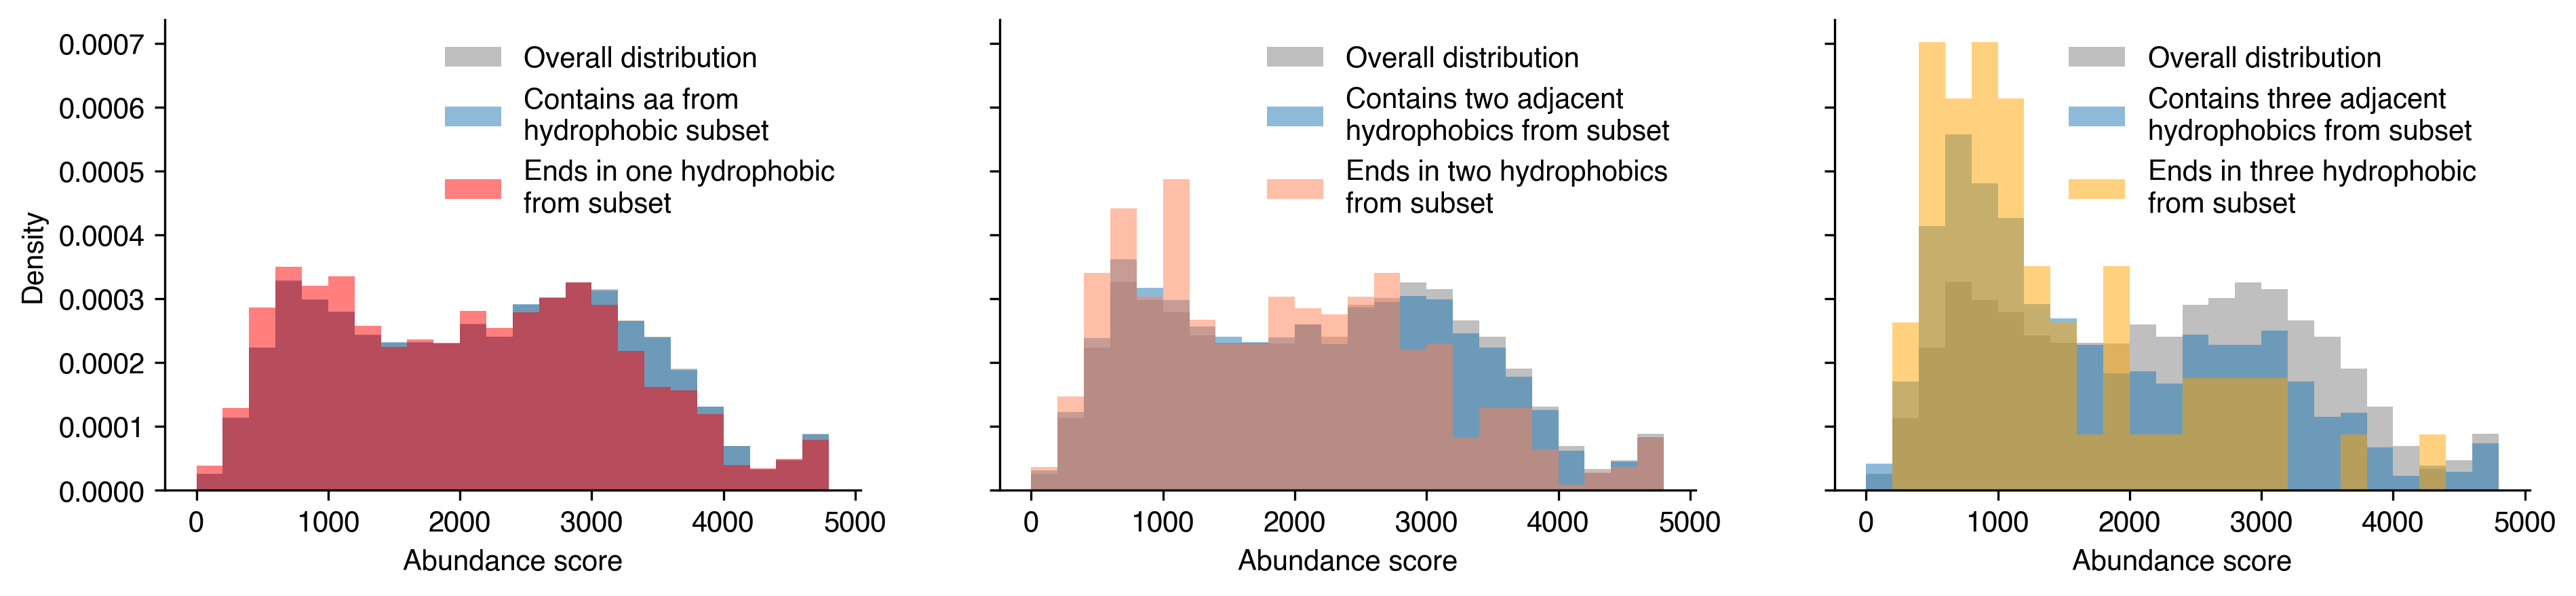

In [252]:
fig, axs = plt.subplots(1, 3, figsize=(15,3), sharey=True, sharex=True)
axs[0].hist(our_data["abundance"], density=True, label="Overall distribution",  alpha=0.5, bins=bins, color='grey')

axs[0].hist(our_data[our_data["contains_subset_hydrophobic"]]["abundance"], density=True, alpha=0.5, label="Contains aa from\nhydrophobic subset ", bins=bins)
axs[0].hist(our_data[our_data["ends_w_subset_hydrophobic"]]["abundance"], density=True, alpha=0.5, label="Ends in one hydrophobic\nfrom subset",  bins=bins, color="red")
axs[0].set_xlabel("Abundance score")
axs[0].set_ylabel("Density")

axs[0].legend(bbox_to_anchor=(1,1), frameon=False)

axs[1].hist(our_data["abundance"], density=True, label="Overall distribution",  alpha=0.5, bins=bins, color='grey')

axs[1].hist(our_data[our_data["contains_two_subset_hydrophobic"]]["abundance"], density=True, alpha=0.5, label="Contains two adjacent\nhydrophobics from subset", bins=bins)
axs[1].hist(our_data[our_data["ends_w_two_subset_hydrophobic"]]["abundance"], density=True, alpha=0.5, label="Ends in two hydrophobics\nfrom subset",  bins=bins, color="coral")
axs[1].set_xlabel("Abundance score")

axs[1].legend(bbox_to_anchor=(1,1), frameon=False)

axs[2].hist(our_data["abundance"], density=True, label="Overall distribution",  alpha=0.5, bins=bins, color='grey')

axs[2].hist(our_data[our_data["contains_three_subset_hydrophobic"]]["abundance"], density=True, alpha=0.5, label="Contains three adjacent\nhydrophobics from subset", bins=bins)
axs[2].hist(our_data[our_data["ends_w_three_subset_hydrophobic"]]["abundance"], density=True, alpha=0.5, label="Ends in three hydrophobic\nfrom subset",  bins=bins, color="orange")
axs[2].set_xlabel("Abundance score")

axs[2].legend(bbox_to_anchor=(0.3,1), frameon=False)

sns.despine()

plt.savefig("../../figures/our_screen_subset.pdf", format='pdf', bbox_inches='tight')

In [240]:
group1 = our_data[our_data['ends_w_hydrophobic']]['abundance'].dropna()
group2 = our_data[our_data['contains_hydrophobic'] & ~our_data['ends_w_hydrophobic'] ]['abundance'].dropna()
stat, p = mannwhitneyu(group1, group2, alternative="less") 
p

1.7409402113325443e-74

In [241]:
group1 = our_data[our_data['ends_w_two_hydrophobic']]['abundance'].dropna()
group2 = our_data[our_data['contains_two_hydrophobic'] & ~our_data['ends_w_two_hydrophobic'] ]['abundance'].dropna()
stat, p = mannwhitneyu(group1, group2, alternative="less") 
p

2.9734610102935088e-86

In [242]:
group1 = our_data[our_data['ends_w_three_hydrophobic']]['abundance'].dropna()
group2 = our_data[our_data['contains_three_hydrophobic'] & ~our_data['ends_w_three_hydrophobic'] ]['abundance'].dropna()
stat, p = mannwhitneyu(group1, group2, alternative="less") 
p

3.981977988402271e-40

In [253]:
group1 = our_data[our_data['ends_w_subset_hydrophobic']]['abundance'].dropna()
group2 = our_data[our_data['contains_subset_hydrophobic'] & ~our_data['ends_w_subset_hydrophobic'] ]['abundance'].dropna()
stat, p = mannwhitneyu(group1, group2, alternative="less") 
p

1.507309178444487e-11

In [254]:
group1 = our_data[our_data['ends_w_two_subset_hydrophobic']]['abundance'].dropna()
group2 = our_data[our_data['contains_two_subset_hydrophobic'] & ~our_data['ends_w_two_subset_hydrophobic'] ]['abundance'].dropna()
stat, p = mannwhitneyu(group1, group2, alternative="less") 
p

1.3474334519769064e-08

In [255]:
group1 = our_data[our_data['ends_w_three_subset_hydrophobic']]['abundance'].dropna()
group2 = our_data[our_data['contains_three_subset_hydrophobic'] & ~our_data['ends_w_three_subset_hydrophobic'] ]['abundance'].dropna()
stat, p = mannwhitneyu(group1, group2, alternative="less") 
p

0.0022053896998190372